In [1]:
import re
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from Bio import SeqIO, Entrez
import py3Dmol

from dotenv import load_dotenv
env_file = '/home/yuan/bio/bio_omics/src/pipelines/.env'
load_dotenv(dotenv_path = env_file)

%load_ext autoreload
%autoreload 2

src_dir = os.path.dirname(os.getcwd())
print('src direcotry is ', src_dir)
bioomics_dir = '/home/yuan/bio/bio_omics/src'
for _dir in (src_dir, bioomics_dir):
    if _dir not in sys.path:
        sys.path.append(_dir)
print(sys.path)

from bioomics import QueryComplex
from plot_pdb import PlotPdb
from layout import Layout

src direcotry is  /home/yuan/bio/predict_antibody
['/home/yuan/bio/localcolabfold/localcolabfold/colabfold-conda/lib/python310.zip', '/home/yuan/bio/localcolabfold/localcolabfold/colabfold-conda/lib/python3.10', '/home/yuan/bio/localcolabfold/localcolabfold/colabfold-conda/lib/python3.10/lib-dynload', '', '/home/yuan/bio/localcolabfold/localcolabfold/colabfold-conda/lib/python3.10/site-packages', '/home/yuan/bio/predict_antibody', '/home/yuan/bio/bio_omics/src']


In [4]:
query = "select * from view_antibody;"
df = QueryComplex(True).list_data(query, True)
df['release_date'] = pd.to_datetime(df['release_date'])

print('PDB: ', len(df['pdb_id'].unique()))
print('chains: ', len(df['chain_id'].unique()))
df.head()

PDB:  8737
chains:  29089


,allele_name,specie,gene_name,gene_family,chain_type,pdb_id,chain_id,model_no,chain_no,pro_id,chain_seq,pro_len,release_date,structure_method,resolution,avg_bfactor,relative_faa,chain_pdb,pdb_group
0,IGKV8-21*01,Mus_musculus,IGKV8-21,IGKV8,K,3IJH,3IJH_0_A_0,0,A,143006,IVMTQSPSSLAVSAGEKVTMSCKSSQSLLNSRTRKNYLAWYQQKPG...,217,2009-10-06,x-ray diffraction,2.10,27.2235,meta_chain_faa/3I/3IJH/3IJH_0_A_0.faa,meta_chain_pdb/3I/3IJH/3IJH_0_A_0.pdb,0.0
1,IGHV7-3*02,Mus_musculus,IGHV7-3,IGHV7,H,3IJH,3IJH_0_B_0,0,B,148148,EVMLVESGGGLVQPGNSLRLSCATSGFTFTDYYMSWVRQPPGKALE...,221,2009-10-06,x-ray diffraction,2.10,29.0730,meta_chain_faa/3I/3IJH/3IJH_0_B_0.faa,meta_chain_pdb/3I/3IJH/3IJH_0_B_0.pdb,0.0
2,IGKV8-21*01,Mus_musculus,IGKV8-21,IGKV8,K,3IJH,3IJH_0_C_0,0,C,143006,IVMTQSPSSLAVSAGEKVTMSCKSSQSLLNSRTRKNYLAWYQQKPG...,217,2009-10-06,x-ray diffraction,2.10,34.2494,meta_chain_faa/3I/3IJH/3IJH_0_C_0.faa,meta_chain_pdb/3I/3IJH/3IJH_0_C_0.pdb,0.0
3,IGHV7-3*02,Mus_musculus,IGHV7-3,IGHV7,H,3IJH,3IJH_0_D_0,0,D,148148,EVMLVESGGGLVQPGNSLRLSCATSGFTFTDYYMSWVRQPPGKALE...,221,2009-10-06,x-ray diffraction,2.10,30.9271,meta_chain_faa/3I/3IJH/3IJH_0_D_0.faa,meta_chain_pdb/3I/3IJH/3IJH_0_D_0.pdb,0.0
4,IGKV1-21*01,Macaca_mulatta,IGKV1-21,IGKV1,K,9IJS,9IJS_0_H_0,0,H,152834,VQLVESGGGLVQPGGSLRLSCAASGFNVYSSSIHWVRQAPGKGLEW...,225,2025-09-03,electron microscopy,3.64,119.2310,meta_chain_faa/9I/9IJS/9IJS_0_H_0.faa,meta_chain_pdb/9I/9IJS/9IJS_0_H_0.pdb,0.0


figure size: 17.4 x 7 cm


<Axes: xlabel='Year', ylabel='Number of structures'>

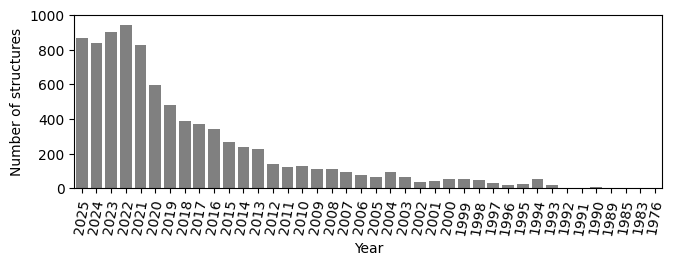

In [8]:
args = {'width_level': 3, 'height': 7}
fig, ax = Layout(args).one()
PlotPdb(df).bar_release(ax)

## structure method

figure size: 11.4 x 7 cm


<Axes: ylabel='Number of Structures'>

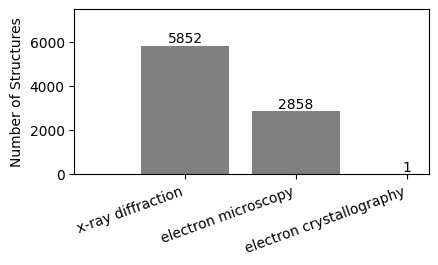

In [9]:
args = {'width_level': 2, 'height': 7}
fig, ax = Layout(args).one()
PlotPdb(df).bar_count_pdb(ax)

## resolution

figure size: 11.4 x 7 cm


<Axes: ylabel='Resolution, log-$\\AA$'>

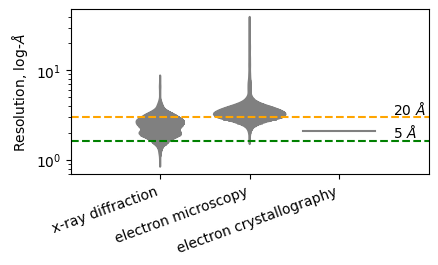

In [10]:
args = {'width_level': 2, 'height': 7}
fig, ax = Layout(args).one()
PlotPdb(df).violin_resolution(ax)

figure size: 17.4 x 8 cm


<Axes: xlabel='Resolution, $\\AA$', ylabel='Number of PDB'>

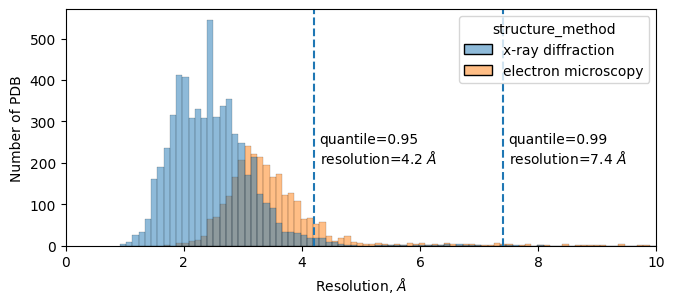

In [11]:
# distribution of resolutions by structure methods
args = {'width_level': 3, 'height': 8}
fig, ax = Layout(args).one()
PlotPdb(df).hist_resolution(ax)

## complex

figure size: 17.4 x 8 cm
Categories:       index  count
0   monomer   3793
1     dimer   2126
2    trimer   1180
3  tetramer    693
4  pentamer    435
5  heptamer    213
6     other    297


<Axes: >

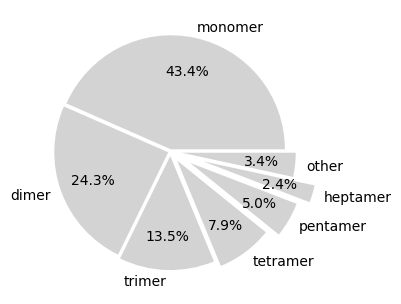

In [12]:
# Protein Complex Types
args = {'width_level': 3, 'height': 8}
fig, ax = Layout(args).one()
PlotPdb(df).pie_complex(ax)

## B-factor

In [13]:
df['structure_method'].value_counts()

structure_method
x-ray diffraction           19168
electron microscopy         10240
electron crystallography        1
Name: count, dtype: int64

figure size: 17.4 x 9 cm
(19168, 3)
Quantile of 0.95, B-factor = 150.0578
Quantile of 0.95, resolution = 3.74


<Axes: xlabel='Average B-factor', ylabel='Resolution, $\\AA$'>

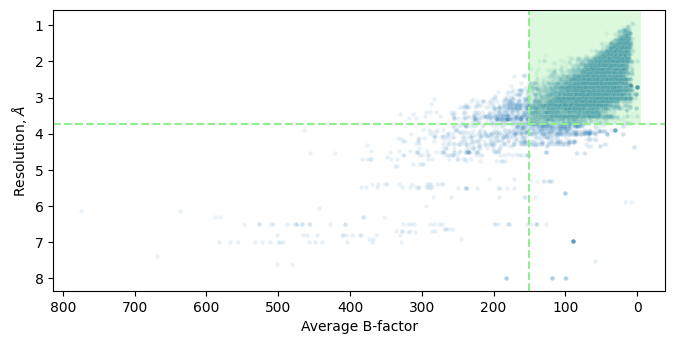

In [14]:
args = {'width_level': 3, 'height': 9}
fig, ax = Layout(args).one()
PlotPdb(df).dot_bfactor(ax, method='x-ray', quantile=.95)

figure size: 17.4 x 9 cm
(10207, 3)
Quantile of 0.95, B-factor = 336.9786999999997
Quantile of 0.95, resolution = 6.5


<Axes: xlabel='Average B-factor', ylabel='Resolution, $\\AA$'>

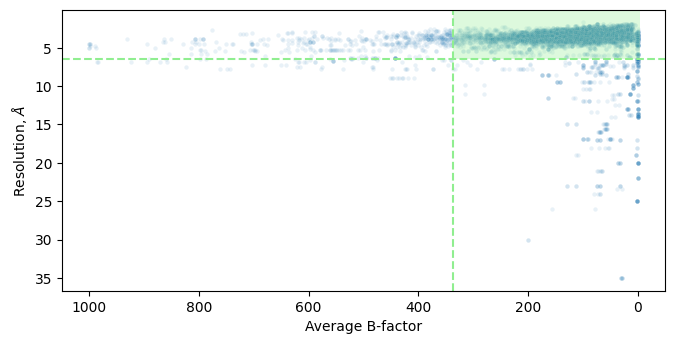

In [15]:
args = {'width_level': 3, 'height': 9}
fig, ax = Layout(args).one()
PlotPdb(df).dot_bfactor(ax, method='electron microscopy', quantile=.95)

## final figures

figure size: 17.4 x 16 cm


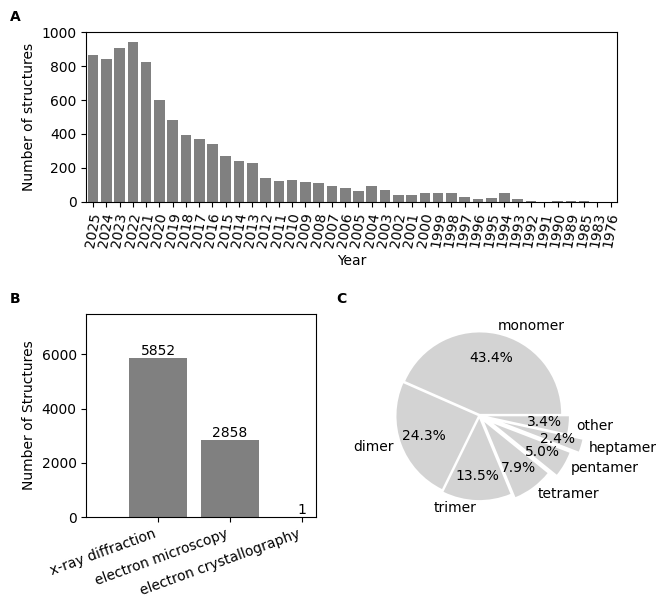

In [16]:
args = {'width_level': 3, 'height': 16, 'wspace':.1, 'hspace':.6,
       'height_ratios': [1, 1.2], 'width_ratios': [1, 1.2] }
label_xytext = [(-55,16), (-55,16), (-30,16)]
fig, axes = Layout(args).row1_row2(label_xytext)

pp = PlotPdb(df, False)
pp.bar_release(axes[0])
pp.bar_count_pdb(axes[1])
pp.pie_complex(axes[2])

fig.savefig('../figures/pdb_summary.tif', dpi=300, bbox_inches='tight', pad_inches=.05)